<a href="https://colab.research.google.com/github/Abhishek-guptaaa/Rice-image-classification-Using-Deep-learing/blob/main/Rice_image_classification_Using_Dee_learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


# Rice Variety Classification and Quality Evaluation Using Image Analysis

```
1.1 | Rice Variety Classification and Quality Evaluation Using Image Analysis
```



Rice, as one of the most prevalent grain crops globally, exhibits significant genetic diversity, resulting in various rice varieties. These varieties exhibit variations in essential characteristics such as texture, shape, and color. By harnessing these differentiating features, it becomes possible to accurately classify and assess the quality of rice seeds.

This research initiative aims to develop a robust image analysis system capable of automatically identifying and categorizing different rice varieties based on their visual attributes. By employing advanced machine learning techniques and deep neural networks, the project endeavors to create a model that can accurately classify rice samples into the five target varieties.

Additionally, the developed image analysis model can contribute to the broader field of computer vision and pattern recognition. The insights gained from this research can be applied to other grain crops and agricultural products, leading to advancements in automated classification and quality evaluation across various agricultural domains.

In summary, the Rice Variety Classification and Quality Evaluation project utilizes a comprehensive dataset of 75,000 rice images to develop a state-of-the-art image analysis system. By accurately classifying and evaluating the quality attributes of five distinct rice varieties, this research aims to enhance rice production processes, support seed selection, and drive advancements in computer vision for agricultural applications. For more information about the dataset use the following Kaggle link:
https://github.com/Abhishek-guptaaa/My_dataset1/raw/refs/heads/main/Rice_Image_Dataset.zip

# 2 | Import Libraries


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings

In [3]:
! wget https://github.com/Abhishek-guptaaa/My_dataset1/raw/refs/heads/main/Rice_Image_Dataset.zip

--2024-10-24 10:43:34--  https://github.com/Abhishek-guptaaa/My_dataset1/raw/refs/heads/main/Rice_Image_Dataset.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Abhishek-guptaaa/My_dataset1/refs/heads/main/Rice_Image_Dataset.zip [following]
--2024-10-24 10:43:35--  https://media.githubusercontent.com/media/Abhishek-guptaaa/My_dataset1/refs/heads/main/Rice_Image_Dataset.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229378744 (219M) [application/zip]
Saving to: ‘Rice_Image_Dataset.zip’

Rice_Image_Dataset. 100%[===================>] 218.75M   110MB/s    in 2.0s    

2024-1

In [4]:
import zipfile

# Path to your zip file
zip_file_path = '/content/Rice_Image_Dataset.zip'

# Open and extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extract all files to the current directory

print("Files extracted")



Files extracted


In [5]:
import os

# Directory path
dir1 = '/content/Rice_Image_Dataset'

# List and filter the contents of the directory, removing the specified file
detection = [class_name for class_name in os.listdir(dir1)]
detection.remove('Rice_Citation_Request.txt')

# Print the remaining items
print(detection)


['Ipsala', 'Basmati', 'Jasmine', 'Arborio', 'Karacadag']


# 3 | Create a dataframe with the Images and Label

In [6]:
dataset_path='/content/Rice_Image_Dataset'
# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

# 4 | Visualization of Dataset

In [7]:
df.head()

,image,label
0,/content/Rice_Image_Dataset/Ipsala/Ipsala (112...,Ipsala
1,/content/Rice_Image_Dataset/Ipsala/Ipsala (130...,Ipsala
2,/content/Rice_Image_Dataset/Ipsala/Ipsala (601...,Ipsala
3,/content/Rice_Image_Dataset/Ipsala/Ipsala (979...,Ipsala
4,/content/Rice_Image_Dataset/Ipsala/Ipsala (896...,Ipsala


<ipython-input-8-0e87da1f3fff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label, palette='Set2')


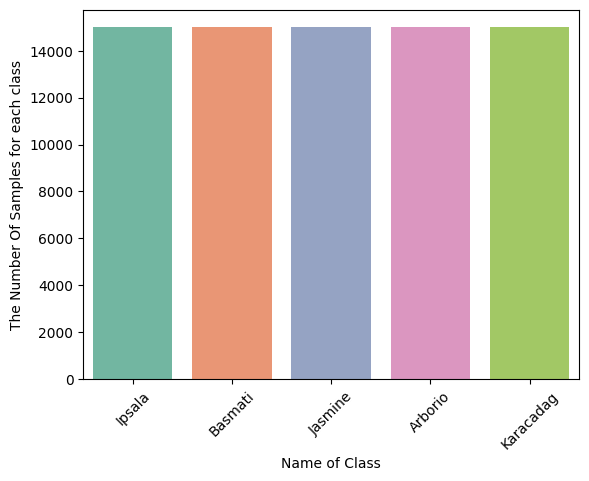

In [8]:
# plot the classes
ax = sns.countplot(x=df.label, palette='Set2')

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

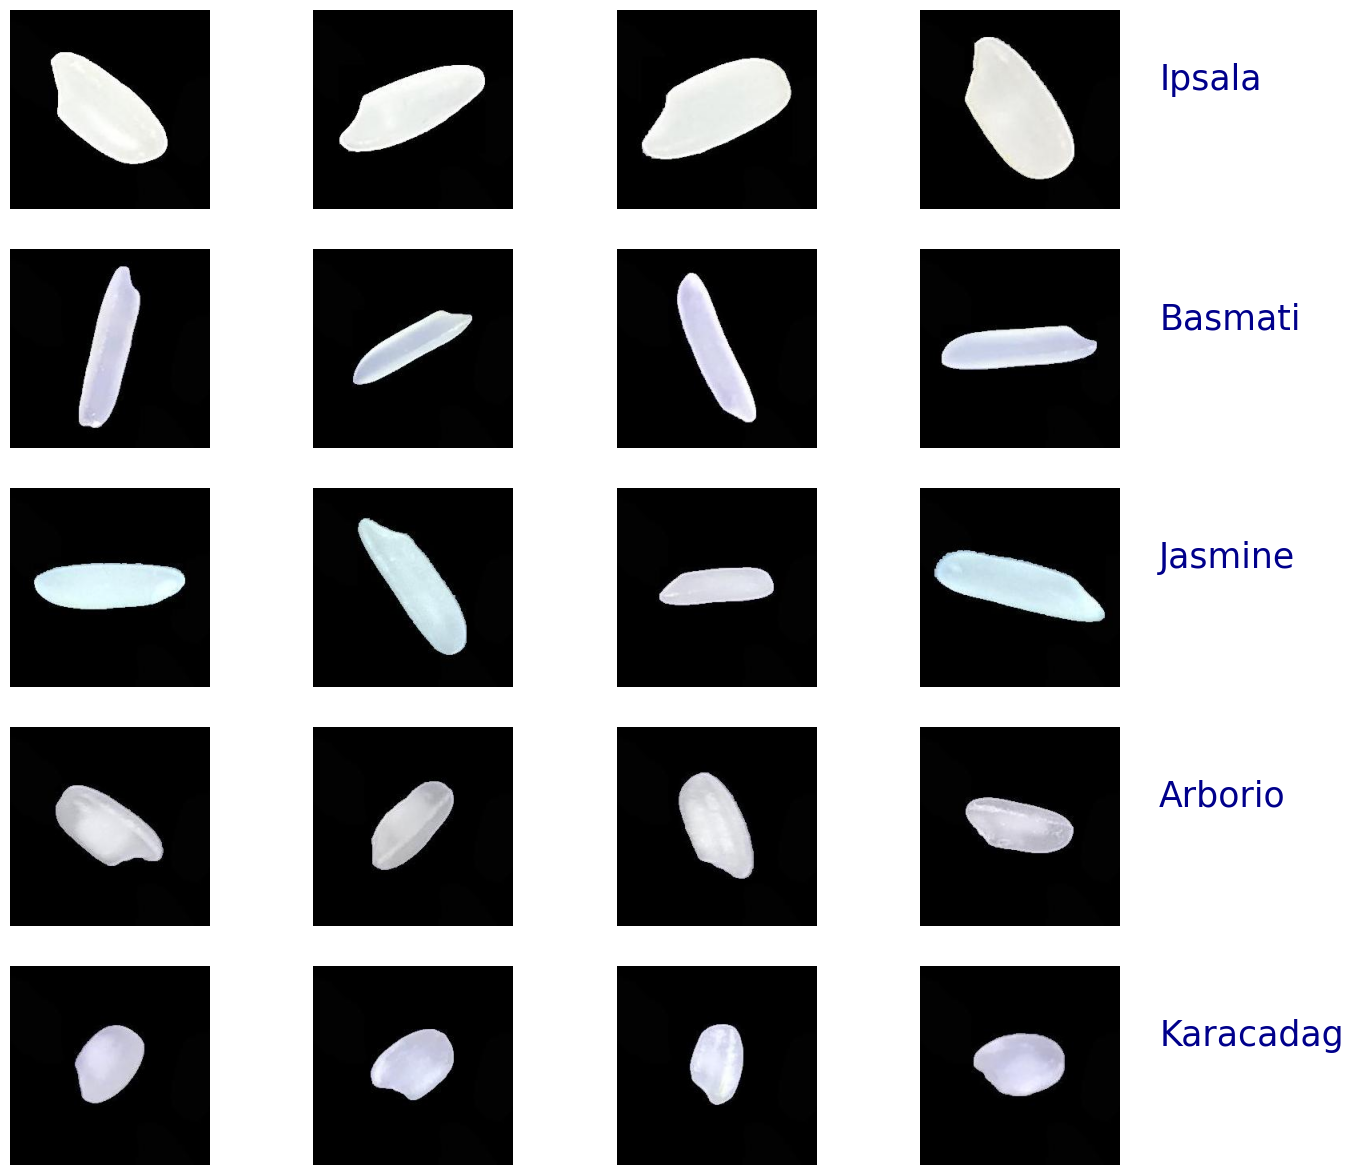

In [9]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]

    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# 6 | Data Augmentation ¶
To streamline the preprocessing of our images, we took the following steps:

we created generators for both the training and testing datasets. These generators allow us to efficiently handle and manipulate the data during the training and testing phases.

to enhance the diversity and robustness of our training data, we applied data augmentation techniques specifically to the training dataset. This augmentation process introduces variations in the images by applying transformations such as rotation, scaling, and flipping. By doing so, we expand the dataset and enable our model to learn from a wider range of image variations.

Additionally, we standardized the image dimensions by reshaping them to a uniform size of 50x50 pixels. This resizing ensures that all images in the dataset have consistent dimensions, facilitating the subsequent processing and analysis stages.

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
